In [6]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd


DROPBOX_IMAGES_PATH = Path("/Users/shaneweisz/Dropbox/Apps/Overleaf/MPhil Thesis Automating Counterspeech/Figures")


tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    # Use 12pt font in plots, to match 12pt font in document
    "axes.labelsize": 12,
    "font.size": 12,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
}


def savefig_to_dropbox(filename):
    full_filename = f"{DROPBOX_IMAGES_PATH}/{filename}"
    plt.savefig(full_filename, bbox_inches="tight")


def set_tex_font_params():
    plt.rcParams.update(tex_fonts)


set_tex_font_params()

FIG_WIDTH = 4.2
FIG_HEIGHT = 3.5
FIGSIZE = (FIG_WIDTH, FIG_HEIGHT)


In [7]:
results_csv = "results.csv"
df = pd.read_csv(results_csv)

In [8]:
df["MinLen"] = df["Model"].apply(lambda x: int(x.split("minlen")[-1]))

In [9]:
df

,Model,Fluency(%),Toxicity(%),BERTScore(%),BLEU-4(%),Dist-2(%),Ent-4,AvgLen,MinLen
0,DGPT-minlen15,96.7,62.2,4.5,0.8,22.1,6.1,10.8,15
1,DGPT-minlen40,95.8,60.4,2.7,1.5,23.9,8.4,29.5,40
2,DGPT-minlen0,95.2,10.1,9.9,0.1,26.3,5.6,4.6,0
3,DGPT-minlen80,92.2,59.2,-18.1,0.9,20.6,8.9,45.2,80
4,DGPT-minlen20,97.0,60.1,5.9,1.5,24.4,7.1,15.4,20
5,DGPT-minlen10,97.7,13.4,6.2,0.5,23.2,5.9,8.5,10
6,DGPT-minlen5,96.1,11.3,10.2,0.1,24.8,5.7,5.3,5


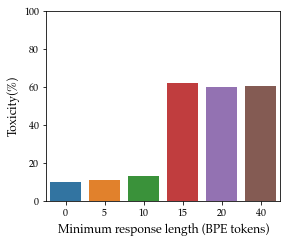

In [10]:
import seaborn as sns
df.sort_values(by="MinLen", inplace=True)
df.drop(3, inplace=True, errors='ignore') # remove minlen80 row
plt.figure(figsize=FIGSIZE)
sns.barplot(x="MinLen", y="Toxicity(%)", data=df)
plt.xlabel("Minimum response length (BPE tokens)")
plt.ylim(0, 100);
savefig_to_dropbox("tox_vs_minlen.pdf")